# Exploring Twitter data
In this notebook, we are going to use our cleaned dataset that we have created in the first notebook.

We are going to do some exploratory analysis in order to understand the shape of the data, patterns and values, correlations between features, hidden meanings behind our data.

## Goal: 
Learn some common aspects of data exploration, calculate some statistics and visualize data column by column.

## Introduction to exploratory data analysis
[Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. (Wikipedia)


### Data exploration process:
 - Computing summary statistics
 - Plotting
 - Additional wrangling if needed.

#### Lets download the cleaned tiwitter data from object storage and display first 5 rows

Load python libraries first. Additional libraries that we are going to use in this notebook are: 
 - [wordcloud](https://amueller.github.io/word_cloud/) -  used to create wordclouds in Python
 - [nltk](https://www.nltk.org/) - natural language toolkit, library to work with language.
 - [folium](https://python-visualization.github.io/folium/) - library for creating maps.

In [1]:
try:
    import urllib.request
except ImportError:
    !pip install  --user  urllib
    import urllib.request
    
try:
    import pandas as pd
except ImportError:
    !pip install  --user  pandas
    import pandas as pd
    
try:
    from wordcloud import WordCloud
except ImportError:
    !pip install  --user wordcloud
    from wordcloud import WordCloud
    
try:
    import matplotlib
    import matplotlib.pyplot as plt
except ImportError:
    !pip install  --user matplotlib
    import matplotlib
    import matplotlib.pyplot as plt

%matplotlib inline

try:
    import nltk
except ImportError:
    !pip install  --user nltk
    import nltk

try:
    import folium
    from folium.plugins import MarkerCluster
except ImportError:
    !pip install  --user folium
    import folium
    from folium.plugins import MarkerCluster

#### Download the cleaned dataset from object store and display first 5 rows
There is a copy of cleaned dataset saved to object store. You can download it or use your local copy, created in the first notebook.
We reading csv file into pandas dataframe and printing first 5 rows.

In [2]:
target_url="https://swift-yeg.cloud.cybera.ca:8080/v1/AUTH_233e84cd313945c992b4b585f7b9125d/geeky-summit/tweets_cleaned.csv"
file_name="tweets_cleaned.csv"
urllib.request.urlretrieve(target_url, file_name) ## comment out this line to use your local copy 

tweets = pd.read_csv(file_name,parse_dates=['created_at_date']) ## reading 'created_at_date' column as timestamp
tweets.head()

,created_at_date,hashtags_string,user_string,user_location,longitude,latitude,name,screen_name,extended_tweet,extended_tweet_cleaned
0,2018-11-02 21:01:56,,Symin16,Toronto ✈ Calgary,NaN,NaN,♠,jessmayumba85,@Symin16 I’d like to know who,I’d like to know who
1,2018-11-02 21:02:01,,TwoCanSamAdams,YYC,NaN,NaN,hannahrae cuddleslug,thimblewad,@TwoCanSamAdams Legit. There are still chunks ...,Legit. There are still chunks in the sink an...
2,2018-11-02 21:02:05,job Calgary SupplyChain Hiring CareerArc,,Calgary,51.004583,-114.007914,TMJ - CAL Manuf Jobs,tmj_cal_manuf,Can you recommend anyone for this #job in #Cal...,"Can you recommend anyone for this in , AB? ..."
3,2018-11-02 21:02:10,,,🌎📱,NaN,NaN,Sunny Rai,TheSunsRay,Kids See Ghosts: love this track,Kids See Ghosts: love this track
4,2018-11-02 21:02:13,Calgary job,,Calgary,50.997882,-114.074005,TMJ-CAL Retail Jobs,tmj_cal_retail,"See our latest #Calgary, AB #job and click to ...","See our latest , AB and click to apply: bar..."


#### We will go column by column, trying to explore the data

### Created_at_date column
This column has type Timestamp. 
Following [features](https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/) can be useful to work wit it:
 - **dt.year** returns the year of the date time.
 - **dt.month** returns the month of the date time.
 - **dt.day** returns the day of the date time.
 - **dt.hour** returns the hour of the date time.
 - **dt.minute** returns the minute of the date time.
   
 Min/max functions can be used with timestamp as well.   
   
 Let's  find out the time range first:

In [3]:
print("Time range: ",min(tweets["created_at_date"]),"-",max(tweets["created_at_date"]))

Time range:  2018-11-02 21:01:56 - 2018-11-09 17:06:22


We have data from 8 days  - from Nov 2nd to Nov 9th. 
#### Let's group by day and calculate number of tweets every day.
([groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) function groups rows into groups based on one or multiple columns.)

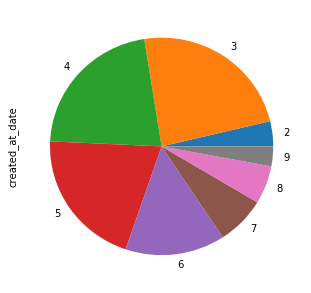

In [29]:
plt.figure( figsize=(5,5))
tweets["created_at_date"].groupby(tweets["created_at_date"].dt.day).count().plot(kind="pie")

In [5]:
print("Total number of tweets: ",tweets.shape[0])
print("Number of tweets collected for Nov 2: ",tweets.loc[tweets["created_at_date"].dt.day==2].shape[0])
print("Number of tweets collected for Nov 3: ",tweets.loc[tweets["created_at_date"].dt.day==3].shape[0])

Total number of tweets:  14793
Number of tweets collected for Nov 2:  552
Number of tweets collected for Nov 3:  3515


 The most data we have for Nov 3rd and the least for Nov9.  
 #### Now we will group by hour to see what is the most active time of the day.  

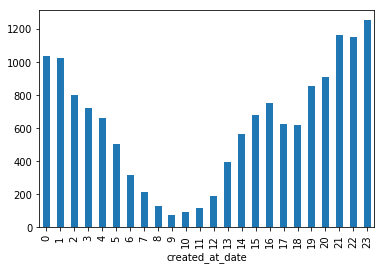

In [6]:
tweets["created_at_date"].groupby([tweets["created_at_date"].dt.hour]).count().plot(kind="bar")

In [7]:
print("Total number of tweets collected between 23:00 and 00:00: ", tweets["created_at_date"].groupby([tweets["created_at_date"].dt.hour]).count()[23])
print("Total number of tweets collected between 09:00 and 10:00: ", tweets["created_at_date"].groupby([tweets["created_at_date"].dt.hour]).count()[9])

Total number of tweets collected between 23:00 and 00:00:  1251
Total number of tweets collected between 09:00 and 10:00:  75


#### Excersise: plot tweets number by day and hour 
Hint: for two conditions in groupby() function use list format []
>instead of groupby(value) use groupby([value1,value2])

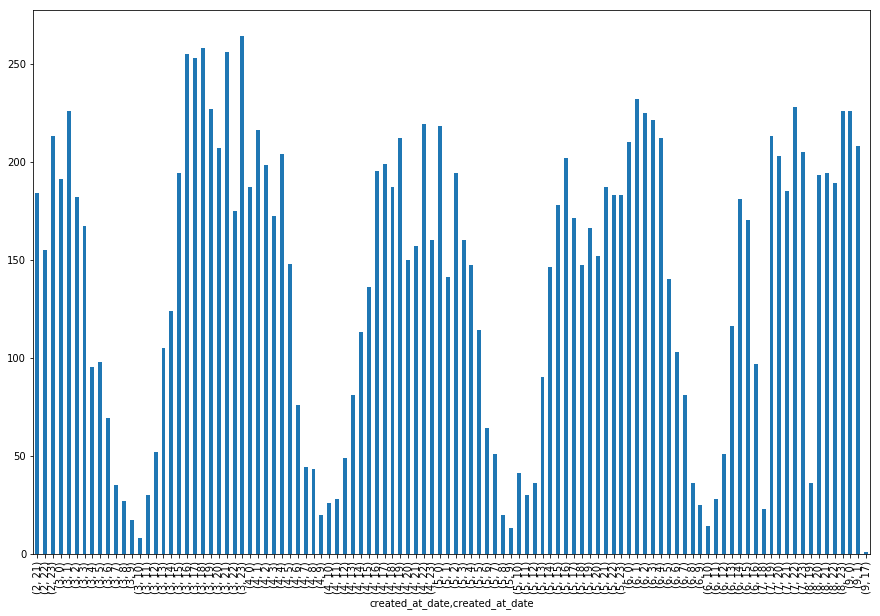

In [8]:
plt.figure( figsize=(15,10))
## this line will be hidden
tweets["created_at_date"].groupby([tweets["created_at_date"].dt.day,tweets["created_at_date"].dt.hour]).count().plot(kind="bar")

### Hashtag_string  and user_mention columns
These two columns are type String and have a list of hastags/user mentions sepataed by blank.  
We will create a list of all the hashtags first using [join()](https://www.tutorialspoint.com/python/string_join.htm) and [split()](https://www.w3schools.com/python/ref_string_split.asp) functions

In [9]:
all_hashtags=" ".join([i for i in tweets['hashtags_string']]).split()
print(all_hashtags)

['job', 'Calgary', 'SupplyChain', 'Hiring', 'CareerArc', 'Calgary', 'job', 'Calgary', 'job', 'job', 'Clerical', 'Calgary', 'Hiring', 'CareerArc', 'hiring', 'job', 'IT', 'Calgary', 'CareerArc', 'job', 'CustomerService', 'Calgary', 'Hiring', 'CareerArc', 'hiring', 'job', 'Hospitality', 'Calgary', 'CareerArc', 'job', 'Calgary', 'GeneralScience', 'Hiring', 'CareerArc', 'Murica', 'hiring', 'Calgary', 'Engineering', 'Job', 'Jobs', 'CareerArc', 'tommykplayhero', 'FakeNews', 'IllegitimatePresident', 'cleaverbeliever', 'Calgary', 'Calgary', 'job', 'Calgary', 'Marketing', 'Job', 'Jobs', 'Hiring', 'CareerArc', 'Calgary', 'cintasjobs', 'CareerArc', 'notimpressed', 'Calgary', 'Art', 'Job', 'Jobs', 'Hiring', 'CareerArc', 'thankyouUK', 'thirdteam', 'job', 'Calgary', 'Labor', 'Hiring', 'CareerArc', 'NFJK', 'job', 'Calgary', 'Accounting', 'Hiring', 'CareerArc', 'job', 'Calgary', 'Automotive', 'Job', 'Jobs', 'Hiring', 'CareerArc', 'This', 'canadagoosecrueltyawarenessday', 'canadagoose', 'canadagoosejack

Then we use [FreqDist()](https://kite.com/python/docs/nltk.probability.FreqDist) function from nltk library to get frequence distribution for all the words.

In [10]:
freque_dist=nltk.FreqDist(all_hashtags)
print("Most common hashtags: ",freque_dist.most_common(20)) ## most_common(n) function prints top n words with highest frequencies

Most common hashtags:  [('Calgary', 678), ('job', 553), ('CareerArc', 538), ('Hiring', 420), ('yyc', 229), ('hiring', 217), ('Job', 121), ('Jobs', 121), ('cdnpoli', 75), ('LoveYYC', 75), ('YYC', 49), ('Flames', 46), ('calgary', 44), ('Habs', 39), ('Hospitality', 36), ('IT', 35), ('Database', 35), ('cintasjobs', 32), ('Accounting', 32), ('BHGE', 31)]


We use matplotlib to print top 25 most common hashtags.   
It's possible to use [plot()](https://kite.com/python/docs/nltk.probability.FreqDist.plot) function directly with FreqDist object.

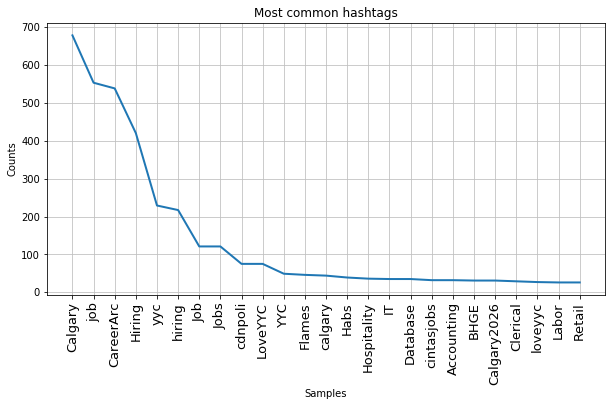

In [11]:
plt.figure(figsize=(10,5)) # plot size
plt.title("Most common hashtags")
plt.xticks(fontsize=13, rotation=90) ## Change rotation and font for x axis labels
freque_dist.plot(25)

#### Most frequent user mentions
We will do the same steps for user_string column:

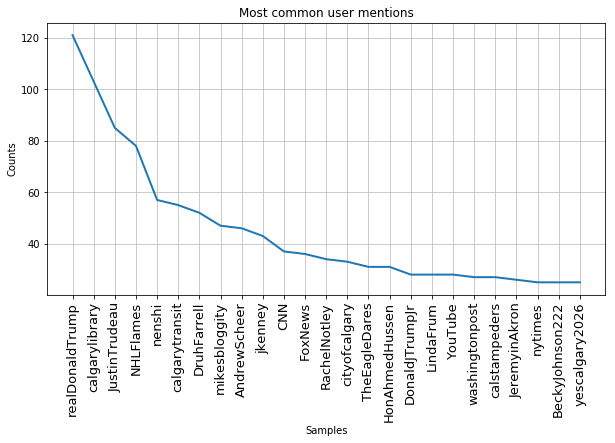

In [12]:
all_users=" ".join([i for i in tweets['user_string']]).split()
plt.figure(figsize=(10,5))
plt.title("Most common user mentions")
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_users)
fd.plot(25)

#### How many users actually use the most common user mention?
We will use [str.contains()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.str.contains.html) function to get rows containing specific string:
> tweets['user_string'].str.contains("realDonaldTrump")

In [13]:
print("Number of tweets with the most common user mention 'realDonaldTrump':",
      len(tweets[tweets['user_string'].str.contains("realDonaldTrump")]['name']))
print("Number of users using the most common user mention 'realDonaldTrump':",
      len(tweets[tweets['user_string'].str.contains("realDonaldTrump")]['name'].unique()))

Number of tweets with the most common user mention 'realDonaldTrump': 120
Number of users using the most common user mention 'realDonaldTrump': 42


#### Which users used the most number of user mentions?

In [14]:
print("Maximum number of user mentions:", max(tweets['user_string'].str.split().str.len()), "made by  ",
      tweets.loc[tweets['user_string'].str.split().str.len() == tweets['user_string'].str.split().str.len().max(), 'name'].unique())

Maximum number of user mentions: 10 made by   ['Rob from Montreal' 'Karen Ung' 'Natasha Cousin' 'Will Tigley'
 'Kari Major ❄']


#### Excersise - try subsetting  data by hour ( for example between 9 and 10 am) and plot most common hashtags or user_mentions

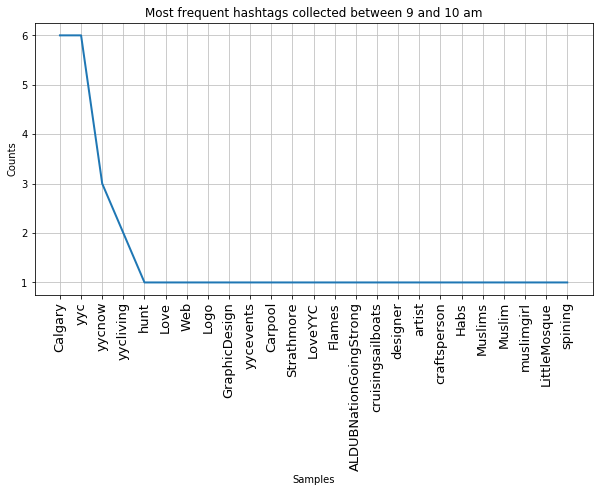

In [15]:
### will be hidden
tweets_subset_hr9=tweets.loc[tweets["created_at_date"].dt.hour==9]
hr9_hashtags=" ".join([i for i in tweets_subset_hr9['hashtags_string']]).split()
plt.figure(figsize=(10,5))
plt.title("Most frequent hashtags collected between 9 and 10 am")
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(hr9_hashtags)
fd.plot(25)

### User_location column

In [16]:
print("Number of unique user locations:", len(tweets["user_location"].unique()), "\n")
print(tweets["user_location"].unique())

Number of unique user locations: 755 

['Toronto ✈ Calgary' 'YYC' 'Calgary' '🌎📱' 'Calgary, Alberta' nan
 'Calgary, AB' 'Montreal' 'Montréal, Québec' '¯\\_(ツ)_/¯' '524 17 AVE SW'
 'Calgary, Alberta, Canada' 'NYC|MTL' 'calgary , alberta, canada'
 'Traphouse' 'Alberta, Canada' 'Tapioca, Connecticut'
 'Calgary, AB, Canada' 'Calgary, Ab' 'Calgary, Treaty 7, Alberta'
 'Connaught, Calgary' 'Canada' 'Los Angeles, CA' 'Calgary & Treaty 7'
 'Edmonton, AB' 'Calgary | Toronto' '100+ countries' 'Calgary, Canada'
 'https://www.youtube.com/watch?v=PfRAdire3dI' 'Okotoks Alberta'
 'Calgary AB' 'Calgary Alberta' 'Okotoks, Alberta'
 'Vancouver, British Columbia' 'Scary Canadian Security risk to the US'
 'Côte-Nord-du-Golfe-du-Saint-La' 'Calgary Alberta Canada'
 'High River, Alberta' 'Calgary, Alberta ' 'Mesa, AZ' 'Seattle, WA'
 'luncheon kingdom' 'Calgary - Treaty 7' 'Ron Southern School Calgary'
 'Downtown, Calgary' 'Calgary. Alberta. Canada'
 '1104 1 Ave NE, Calgary, AB' 'ÜT: 50.9398707,-113.9842441'
 

There are 755 unique user_locations. We can't do much with this column, let's look into latitude/longitude instead.

### Latitude/longitude columns
We will subset data by day(to make it faster) and plot tweets that have location on a map.

In [17]:
print("Total number of tweets: ",tweets.shape[0])
tweets_have_location=tweets[tweets["longitude"].notnull()]
print("Number of tweets having location data: ",tweets_have_location.shape[0])

tweets_subset_nov5=tweets_have_location.loc[tweets_have_location["created_at_date"].dt.day==5]
print("Number of tweets having location data for Nov 5: ",tweets_subset_nov5.shape[0])

Total number of tweets:  14793
Number of tweets having location data:  2321
Number of tweets having location data for Nov 5:  517


we will use [iterrrows()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html) function to iterate through dataframe rows:

In [18]:
calgary_coords = [51.0486, -114.0708]
my_map = folium.Map(location = calgary_coords, zoom_start = 13)

for index,row in tweets_subset_nov5.iterrows():  
        folium.Marker([row["longitude"], row["latitude"]]).add_to(my_map) 
my_map

#### Excersise: try subsetting by user mention (e.g "calgarylibrary")
Hint: use str.contains() function applied to tweets['user_string'] colum.

In [19]:
### this will be hidden

tweets_subset_lib=tweets_have_location.loc[tweets['user_string'].str.contains("calgarylibrary")]
print("Number of tweets having location data that mentionin calgarylibrary",tweets_subset_lib.shape[0])
calgary_coords = [51.0486, -114.0708]
my_map = folium.Map(location = calgary_coords, zoom_start = 13)

for index,row in tweets_subset_lib.iterrows():
        folium.Marker([row["longitude"], row["latitude"]]).add_to(my_map) 
my_map

Number of tweets having location data that mentionin calgarylibrary 14


### Screen_name column

In [20]:
print("Total number of tweets: ",tweets.shape[0])
print("Total number of users: ",tweets['screen_name'].unique().shape[0])
print("Top 20 most active users:")
tweets["screen_name"].groupby(tweets["screen_name"]).count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)#.plot(kind="bar")


Total number of tweets:  14793
Total number of users:  2897
Top 20 most active users:


,screen_name,count
10,311calgary,437
765,LMHPhotog,284
2314,mgcanmore,213
2241,lisa_m_228,210
2351,montrealdesign,173
652,JasonP_YYC,159
2793,trevormarr1,157
1029,PaulBruce_Ouch,154
1089,Rarcham2018,150
2388,nattyroons,112


###  extended_tweet_cleaned column
Creating wordcloud of most common words.  
wordcloud package has pre-existing list of stopwords (words that can be excluded from the analysis).  
Lets import them and examine:

In [21]:
from wordcloud import  STOPWORDS
print(STOPWORDS)

{'same', 'through', "wasn't", 'very', "what's", 'there', 'other', 'just', 'any', 'cannot', 'not', "that's", 'ought', 'could', 'most', 'their', "we're", 'it', 'some', 'here', 'an', 'ourselves', "wouldn't", "there's", 'from', 'about', "aren't", 'they', 'com', "he's", "i'd", "here's", 'herself', 'once', 'between', "they'll", 'her', 'all', 'theirs', 'being', "we'll", 'to', 'doing', 'having', "she'd", 'few', "he'll", 'themselves', 'during', "you're", 'over', 'like', 'have', 'into', 'were', "they'd", 'than', "we'd", 'or', "where's", 'was', 'been', 'he', "doesn't", 'would', 'its', 'after', 'ours', 'own', 'where', 'however', 'myself', 'shall', 'himself', 'then', 'your', 'does', 'on', 'can', 'again', "can't", 'down', "he'd", 'had', "you'd", 'she', 'else', 'ever', 'get', 'out', 'his', "hasn't", 'as', "shan't", 'in', "they're", 'whom', 'because', 'yours', 'r', "she's", 'since', 'more', 'but', 'am', 'has', "couldn't", 'me', 'our', "let's", 'up', 'k', 'of', 'why', 'how', 'when', "won't", 'http', "w

Now we are using [WordCloud()](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud) function from wordcloud library (random_state is set for reproducibility and collocation=False means that if the same word in encountered in collocation with different words - it still be considered as one word (to remove duplicates)).

In [22]:
stopwords = set(STOPWORDS)
def wordcloud(tweets,col):
    wordcloud = WordCloud(collocations=False,background_color="white",stopwords=stopwords,random_state = 2018).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud)
    plt.axis("off") 

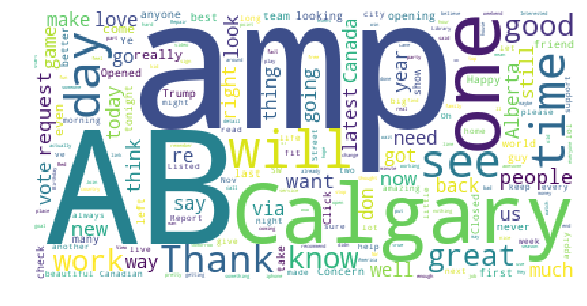

In [23]:
wordcloud(tweets,'extended_tweet_cleaned')

#### Amp? (investigate and remove)
Looks like the most common word is  amp, lets find out example tweets where we can see it and inspect them.

In [24]:
pd.set_option('max_colwidth', 700)
tweets[tweets['extended_tweet_cleaned'].str.contains("amp")]['extended_tweet_cleaned'].head()

6                                                    Please read and share and donate ten bucks. There are 5 homeless memorials in Canada and Calgary needs to be  . This is important. This is the starting point of our Campaign and we need to get to $10000. Give us a hand please and thank you
29                                                                                                                                                        Weather might be cold but we’re coming in hot this weekend with our brunch!!! Sat &amp; Sun at 10AM.     @ Cleaver, 50 Seats &amp; a Cow. 
69                                                                                                                                          Closed Report Concern Not Listed request at 313 18 AV SW  Completed. link: 18-01068530 corporate - encampment concerns linked nov 02, 2018 03:17:06 pm. 
86    A tale of two countries, in the US the GDP is growing, in Canada it’s slowing. In the US jobs are plentiful &amp; w

It appears that &amp is just a shortcut for ampersand.   
Lets delete all the &amp occurences from 'extended_tweet_cleaned' column.

In [25]:
tweets['extended_tweet_cleaned']=tweets['extended_tweet_cleaned'].str.replace('&amp',' ')

#### Exclude "one" and "will" words
"one" and "will" words can be possibly excluded as well, they don't have any special meaning.

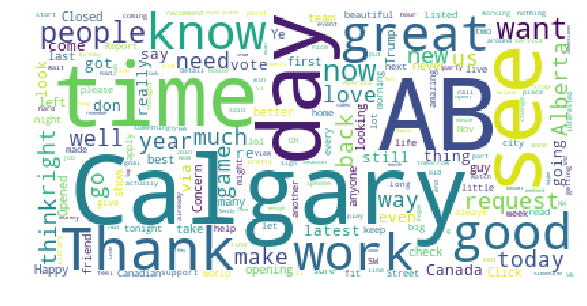

In [26]:
stopwords.add("one")
stopwords.add("will")
wordcloud(tweets,'extended_tweet_cleaned')

#### Excersise: add Calgary and AB(or othwer words) to stowords to  exclude them from wordcloud and try plotting wordcloud again.

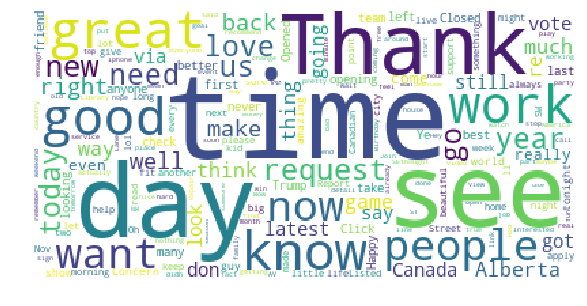

In [27]:
stopwords.add("Calgary") ## this will be hidden
stopwords.add("AB")
wordcloud(tweets,'extended_tweet_cleaned')

### Save data to csv
We have done some additonal wrangling, so we are going to save updated dataset to csv.

In [28]:
tweets.to_csv('tweets_cleaned1.csv',index=False)

##  Conclusion

We've done some of the data exploration, tried to understand the data. 

Take-aways: 
*  
*
*

Next, we will go deeper into natural language processing, will  build topic models  and do sentiment analysis